In [1]:
import pandas as pd
import yfinance as yf
from model import StockPricePredictor

In [2]:
company_ticker = {
    'Apple': 'AAPL',
    'Google': 'GOOG',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN'
}

In [3]:
for key in company_ticker:
    data = yf.download(company_ticker[key], period="1mo")
    data.to_csv(f"data_{key}.csv", sep=',', encoding='utf-8', header=True, index=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Root Mean Squared Error: 1.6055851777349361
R2 Score: -6.613556158090119
Predicted stock prices for the next 3 days:
 [[168.48059761]
 [168.38498744]
 [168.28937727]]


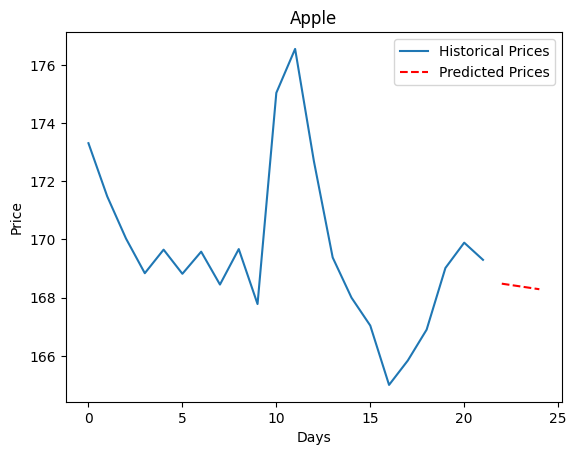

Root Mean Squared Error: 1.9063718709202577
R2 Score: 0.49438472318720716
Predicted stock prices for the next 3 days:
 [[162.77840862]
 [163.21892498]
 [163.65944134]]


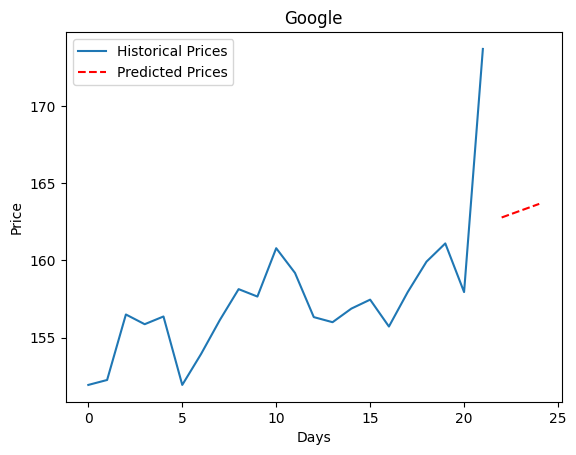

Root Mean Squared Error: 6.533153121701608
R2 Score: 0.29871602851096724
Predicted stock prices for the next 3 days:
 [[401.43266678]
 [400.15080738]
 [398.86894798]]


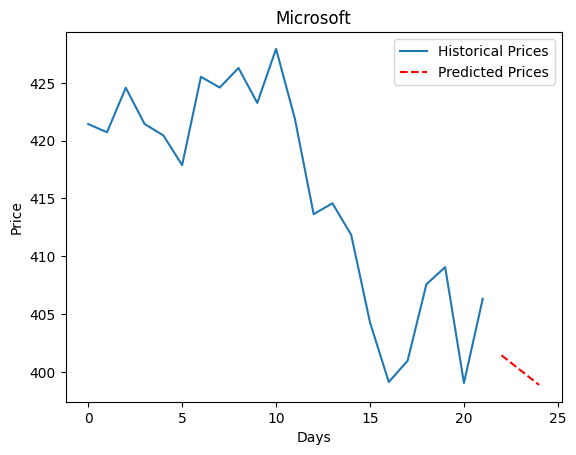

Root Mean Squared Error: 3.7772868735622938
R2 Score: -1.855507612764856
Predicted stock prices for the next 3 days:
 [[177.38404448]
 [177.01675979]
 [176.64947511]]


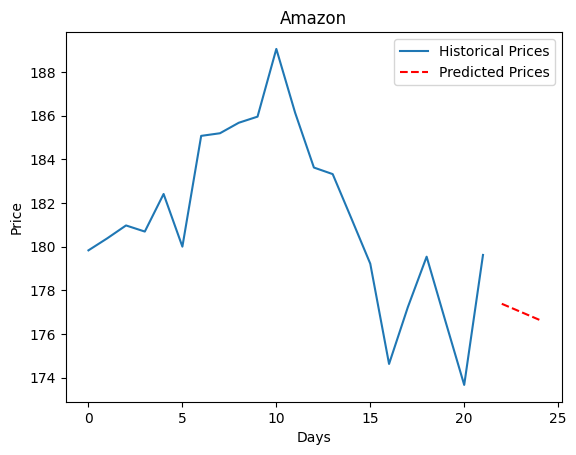

In [3]:
for key in company_ticker:
    df = pd.read_csv(f"data_{key}.csv")
    predictor = StockPricePredictor(df["Adj Close"])
    predictor.prepare_data()
    predictor.train_model()
    future_prices = predictor.predict_price(3)
    print("Predicted stock prices for the next 3 days:\n", future_prices)
    predictor.plot_prices(3, title= key)
